### 1. Library Imports
We start by importing necessary Python libraries for data analysis, visualization, or machine learning.

Mounted at /content/drive
Shape: (700, 10)
Columns: ['Task_ID', 'Task_Name', 'UserID', 'Description', 'Assigned_To', 'Progress', 'Priority', 'Completion_Time', 'Deadline', 'User_Sentiment']
    Task_ID                                                  Task_Name UserID                                                                                                                                                                                                                                                                                         Description Assigned_To  Progress Priority  Completion_Time    Deadline User_Sentiment
0     T1000             Task 001 of Renovation of a School Project 001   U001                                     Task involves critical work for the General Project. This task has a medium priority and is expected to be completed in approximately 12 hours. The deadline for this task is 2024-08-08. Current user sentiment is 'frustrated', which may impact performa

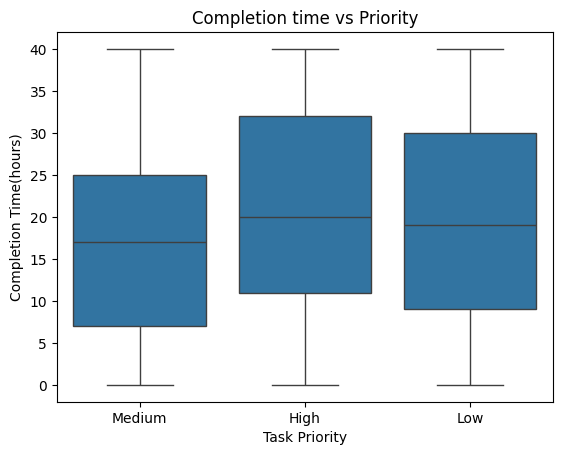

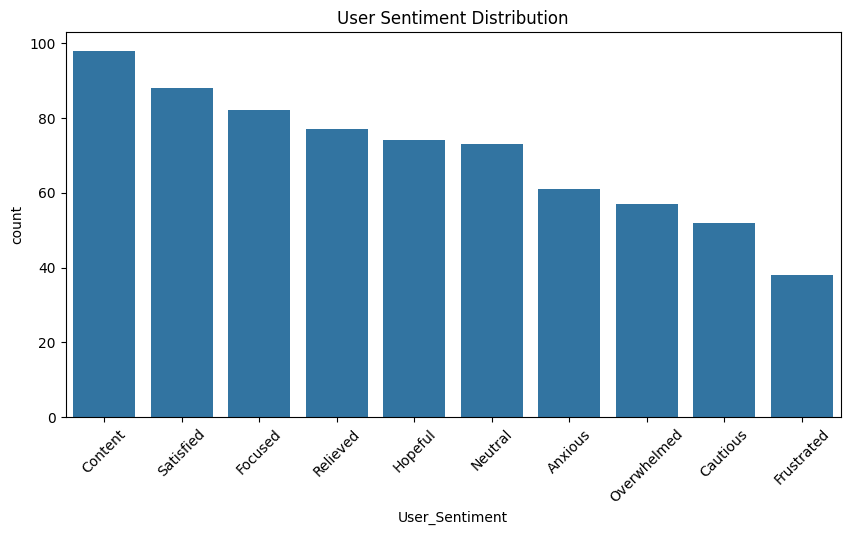

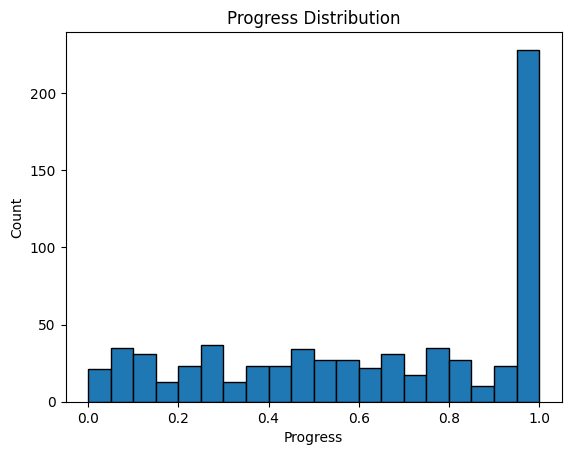

In [ ]:
# EDA AND DATA CLEANING

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/MyDrive/AI_TASK_MANAGEMENT_PROJECT/Task_Management_Dataset.csv'
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/AI_TASK_MANAGEMENT_PROJECT/Task_Management_Dataset.csv')

print("Shape:", df.shape)  # Show number of rows and columns
print("Columns:", df.columns.tolist())  # Show column names
print(df.to_string())

print("\nDataset Info:")
print(df.info())

print("\nsummary statistics")
print(df.describe(include='all'))

print("\nNull values:")
print(df.isnull().sum())

print("\nUnique values in each column:")
for col in df.columns:
    print(f"{col}:{df[col].nunique()} unique values")

df['Deadline'] = pd.to_datetime(df['Deadline'], errors='coerce')
print(df['Deadline'].isna().sum())  # should be 0 if all dates parsed correctly
print("Duplicate rows:", df.duplicated().sum())
print(df['Priority'].value_counts())
print(df['User_Sentiment'].value_counts())

df["Priority"]=df["Priority"].str.strip().str.capitalize()
df["User_Sentiment"]=df["User_Sentiment"].str.strip().str.capitalize()
#checking outliers
print(df['Completion_Time'].describe())
print(df['Progress'].describe())

sns.boxplot(data=df, x = "Priority", y ="Completion_Time")
plt.title("Completion time vs Priority")
plt.xlabel("Task Priority")
plt.ylabel("Completion Time(hours)")
plt.show()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='User_Sentiment',order=df['User_Sentiment'].value_counts().index)
plt.title("User Sentiment Distribution")
plt.xticks(rotation=45)
plt.show(block=True)

plt.hist(df['Progress'],bins = 20 , edgecolor='black')
plt.title("Progress Distribution")
plt.xlabel("Progress")
plt.ylabel("Count")
plt.show()

### 2. Library Imports
We start by importing necessary Python libraries for data analysis, visualization, or machine learning.

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 101.3 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.
Available columns: Index(['task_id', 'task_name', 'userid', 'description', 'assigned_to',
       'progress', 'priority', 'completion_time', 'deadline',
       'user_sentiment'],
      dtype='object')


100%|██████████| 700/700 [00:06<00:00, 106.68it/s]


                                         description  \
0  Task involves critical work for the General Pr...   
1  Task involves critical work for the General Pr...   
2  Task involves critical work for the General Pr...   
3  Task involves critical work for the General Pr...   
4  Task involves critical work for the General Pr...   

                               processed_description  desc_word_count  \
0  task involve critical work general project tas...               40   
1  task involve critical work general project tas...               40   
2  task involve critical work general project tas...               40   
3  task involve critical work general project tas...               40   
4  task involve critical work general project tas...               40   

   processed_token_count  
0                     22  
1                     22  
2                     22  
3                     22  
4                     22  


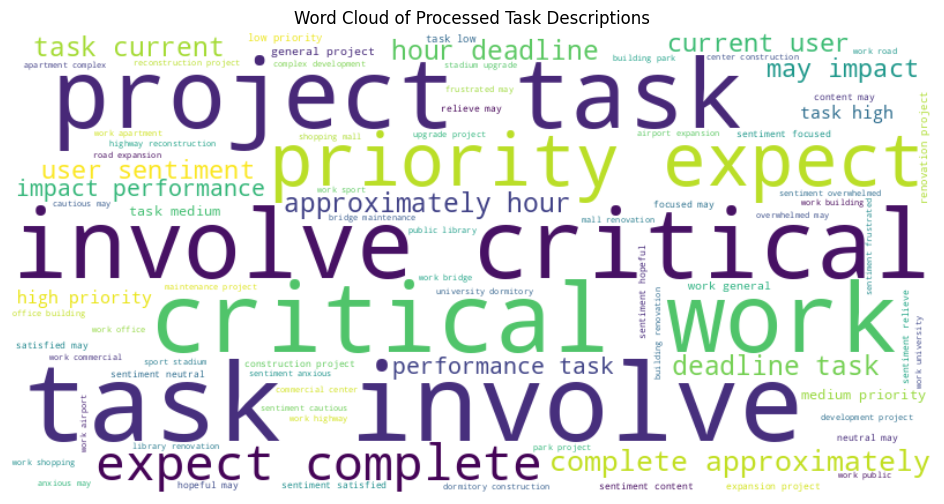

Preprocessing complete and saved to processed_task_dataset.csv


100%|██████████| 700/700 [00:06<00:00, 112.84it/s]


,description,processed_description
0,Task involves critical work for the General Pr...,task involve critical work general project tas...
1,Task involves critical work for the General Pr...,task involve critical work general project tas...
2,Task involves critical work for the General Pr...,task involve critical work general project tas...
3,Task involves critical work for the General Pr...,task involve critical work general project tas...
4,Task involves critical work for the General Pr...,task involve critical work general project tas...


In [ ]:
# NLP PREPROCESSING ON TASK DESCRIPTION

import pandas as pd
import spacy
from nltk.corpus import stopwords
from tqdm import tqdm
import nltk
from wordcloud import WordCloud
import matplotlib.pyplot as plt


nltk.download('stopwords')

!python -m spacy download en_core_web_sm

nlp = spacy.load("en_core_web_sm") # Load spaCy English model

df = pd.read_csv('/content/drive/MyDrive/AI_TASK_MANAGEMENT_PROJECT/Task_Management_Dataset.csv')

df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
print("Available columns:", df.columns)

stop_words = set(stopwords.words('english'))

# Preprocessing function using spaCy + stopwords removal + lemmatization
def preprocess_text(text):
    if pd.isna(text):
        return ''

    # Tokenization and Lowercase
    doc = nlp(text.lower())

    # Filtering alphabetic tokens, removal of stopwords, and lemmatize
    tokens = [token.lemma_ for token in doc if token.is_alpha and token.text not in stop_words]

    return ' '.join(tokens)

tqdm.pandas()

# Preprocessing on Task Description
df['processed_description'] = df['description'].progress_apply(preprocess_text)

# Adding word count columns for original and processed descriptions
df['desc_word_count'] = df['description'].fillna('').apply(lambda x: len(x.split()))
df['processed_token_count'] = df['processed_description'].apply(lambda x: len(x.split()))

print(df[['description', 'processed_description', 'desc_word_count', 'processed_token_count']].head())

all_text = ' '.join(df['processed_description'].dropna())
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Processed Task Descriptions')
plt.show()

df.to_csv('/content/drive/MyDrive/AI_TASK_MANAGEMENT_PROJECT/processed_task_dataset.csv', index=False)

print("Preprocessing complete and saved to processed_task_dataset.csv")

tqdm.pandas()
df['processed_description'] = df['description'].progress_apply(preprocess_text)

df[['description', 'processed_description']].head()

### 3. Library Imports
We start by importing necessary Python libraries for data analysis, visualization, or machine learning.

In [ ]:
###   weak 2

import pandas as pd

# Load the processed dataset
file_path = r"/processed_task_dataset.csv"
processed_df = pd.read_csv(file_path)

# Display the first few rows and column info
processed_df.head(), processed_df.columns.tolist()


(  task_id                                          task_name userid  \
 0   T1000     Task 001 of Renovation of a School Project 001   U001   
 1   T1001     Task 002 of Renovation of a School Project 001   U002   
 2   T1002     Task 003 of Renovation of a School Project 001   U002   
 3   T1003  Task 001 of Innovation of a Classroom Project 002   U002   
 4   T1004  Task 002 of Innovation of a Classroom Project 002   U002   
 
                                          description assigned_to  progress  \
 0  Task involves critical work for the General Pr...         Bob      0.24   
 1  Task involves critical work for the General Pr...     Charlie      0.56   
 2  Task involves critical work for the General Pr...     Charlie      1.00   
 3  Task involves critical work for the General Pr...     Charlie      0.33   
 4  Task involves critical work for the General Pr...     Charlie      0.32   
 
   priority  completion_time    deadline user_sentiment  \
 0   Medium               12  0

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

### 4. Library Imports
We start by importing necessary Python libraries for data analysis, visualization, or machine learning.

In [ ]:
# Re-import required package after code state reset
import pandas as pd

# Reload the file after reset
file_path = "/content/processed_task_dataset.csv"
processed_df = pd.read_csv(file_path)

# Show a preview of the data
processed_df.head(), processed_df.columns.tolist()


(  task_id                                          task_name userid  \
 0   T1000     Task 001 of Renovation of a School Project 001   U001   
 1   T1001     Task 002 of Renovation of a School Project 001   U002   
 2   T1002     Task 003 of Renovation of a School Project 001   U002   
 3   T1003  Task 001 of Innovation of a Classroom Project 002   U002   
 4   T1004  Task 002 of Innovation of a Classroom Project 002   U002   
 
                                          description assigned_to  progress  \
 0  Task involves critical work for the General Pr...         Bob      0.24   
 1  Task involves critical work for the General Pr...     Charlie      0.56   
 2  Task involves critical work for the General Pr...     Charlie      1.00   
 3  Task involves critical work for the General Pr...     Charlie      0.33   
 4  Task involves critical work for the General Pr...     Charlie      0.32   
 
   priority  completion_time    deadline user_sentiment  \
 0   Medium               12  0

### 5. Library Imports
We start by importing necessary Python libraries for data analysis, visualization, or machine learning.

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
file_path = "/content/processed_task_dataset.csv"
processed_df = pd.read_csv(file_path)

In [ ]:
# Check if required columns are present
assert 'processed_description' in processed_df.columns
assert 'priority' in processed_df.columns

### 6. Model Training or Prediction
This section involves training a machine learning model or making predictions.

In [ ]:
# TF-IDF vectorization on the processed descriptions
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(processed_df["processed_description"])
y = processed_df["priority"]

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
# Initialize models
nb_model = MultinomialNB()
svm_model = LinearSVC()

### 7. Model Training or Prediction
This section involves training a machine learning model or making predictions.

In [ ]:
# Train models
nb_model.fit(X_train, y_train)
svm_model.fit(X_train, y_train)

LinearSVC()

### 8. Model Training or Prediction
This section involves training a machine learning model or making predictions.

In [ ]:
# Predict
nb_preds = nb_model.predict(X_test)
svm_preds = svm_model.predict(X_test)

### 9. Function: `evaluate_model`
This function is defined below. We will briefly explain what it does in the context of the project.


Naive Bayes Results:
Accuracy: 0.9714
Precision: 0.9728
Recall: 0.9714
Classification Report:
               precision    recall  f1-score   support

        High       0.95      1.00      0.97        77
         Low       1.00      0.89      0.94        19
      Medium       1.00      0.95      0.98        44

    accuracy                           0.97       140
   macro avg       0.98      0.95      0.97       140
weighted avg       0.97      0.97      0.97       140



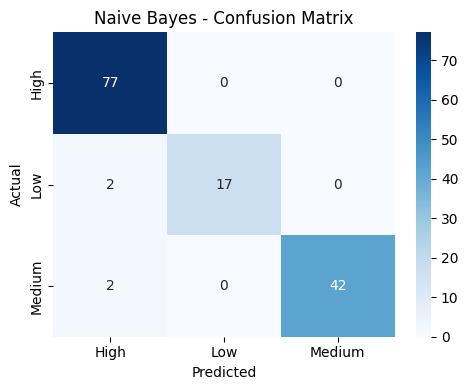


SVM Results:
Accuracy: 1.0000
Precision: 1.0000
Recall: 1.0000
Classification Report:
               precision    recall  f1-score   support

        High       1.00      1.00      1.00        77
         Low       1.00      1.00      1.00        19
      Medium       1.00      1.00      1.00        44

    accuracy                           1.00       140
   macro avg       1.00      1.00      1.00       140
weighted avg       1.00      1.00      1.00       140



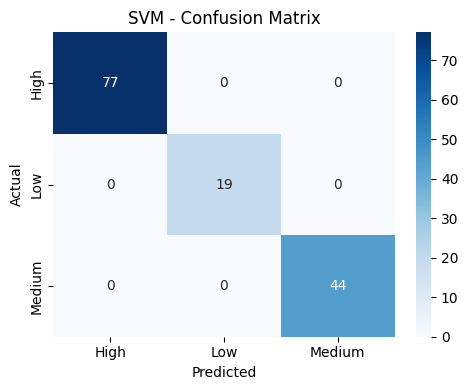

In [ ]:
# Evaluation function
def evaluate_model(name, y_true, y_pred, labels):
    acc = accuracy_score(y_true, y_pred)
    prec = precision_score(y_true, y_pred, average='weighted', zero_division=0)
    rec = recall_score(y_true, y_pred, average='weighted', zero_division=0)
    print(f"\n{name} Results:")
    print(f"Accuracy: {acc:.4f}")
    print(f"Precision: {prec:.4f}")
    print(f"Recall: {rec:.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred, zero_division=0))

    # Confusion matrix
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', xticklabels=labels, yticklabels=labels, cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

# Get unique labels for confusion matrix
labels = sorted(y.unique())

# Evaluate both models
evaluate_model("Naive Bayes", y_test, nb_preds, labels)
evaluate_model("SVM", y_test, svm_preds, labels)

In [ ]:
# 🔹 Step 1: Load and Prepare the Data
import pandas as pd

df = pd.read_csv("/processed_task_dataset.csv")

# Encode categorical variables
from sklearn.preprocessing import LabelEncoder

le_priority = LabelEncoder()
le_sentiment = LabelEncoder()

df["priority_encoded"] = le_priority.fit_transform(df["priority"])
df["sentiment_encoded"] = le_sentiment.fit_transform(df["user_sentiment"])

# Feature set and target variable
features = ["desc_word_count", "processed_token_count", "completion_time", "sentiment_encoded"]
X = df[features]
y = df["priority_encoded"]


In [ ]:
# 🔹 Step 2: Train-Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
#  🔹 Step 3: Train Model
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Train Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_preds = rf.predict(X_test)

# Train XGBoost without deprecated 'use_label_encoder' parameter
xgb = XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb.fit(X_train, y_train)
xgb_preds = xgb.predict(X_test)



Random Forest Evaluation:
Accuracy: 0.7500
Precision: 0.7438
Recall: 0.7500
Classification Report:
               precision    recall  f1-score   support

        High       0.81      0.92      0.86        77
         Low       0.53      0.53      0.53        19
      Medium       0.73      0.55      0.62        44

    accuracy                           0.75       140
   macro avg       0.69      0.66      0.67       140
weighted avg       0.74      0.75      0.74       140



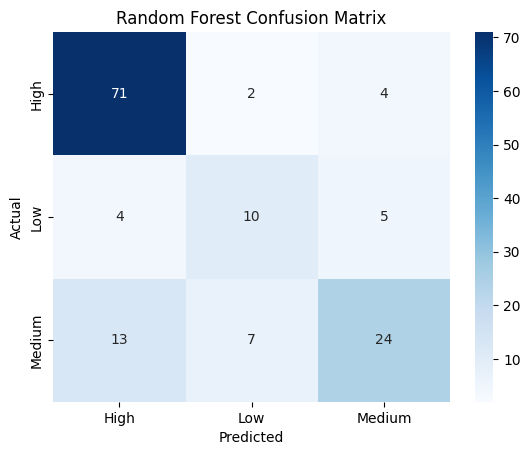


XGBoost Evaluation:
Accuracy: 0.7571
Precision: 0.7514
Recall: 0.7571
Classification Report:
               precision    recall  f1-score   support

        High       0.80      0.88      0.84        77
         Low       0.59      0.53      0.56        19
      Medium       0.74      0.64      0.68        44

    accuracy                           0.76       140
   macro avg       0.71      0.68      0.69       140
weighted avg       0.75      0.76      0.75       140



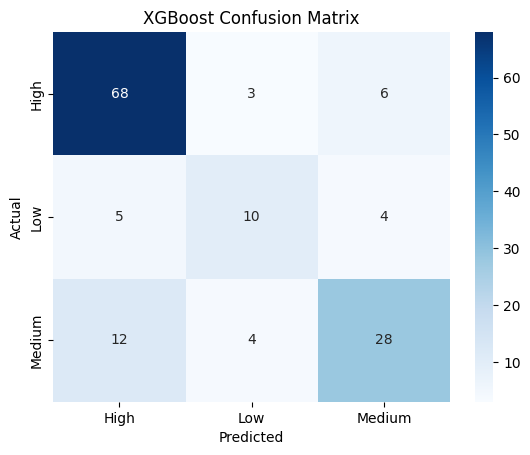

In [ ]:
# 🔹 Step 4: Evaluate Models
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

def evaluate(name, y_true, y_pred):
    print(f"\n{name} Evaluation:")
    print(f"Accuracy: {accuracy_score(y_true, y_pred):.4f}")
    print(f"Precision: {precision_score(y_true, y_pred, average='weighted'):.4f}")
    print(f"Recall: {recall_score(y_true, y_pred, average='weighted'):.4f}")
    print("Classification Report:\n", classification_report(y_true, y_pred, target_names=le_priority.classes_))

    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=le_priority.classes_, yticklabels=le_priority.classes_)
    plt.title(f"{name} Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

# Evaluate models
evaluate("Random Forest", y_test, rf_preds)
evaluate("XGBoost", y_test, xgb_preds)


In [ ]:
# 🔹 Step 5: GridSearchCV for Tuning
from sklearn.model_selection import GridSearchCV

rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
}

grid_rf = GridSearchCV(RandomForestClassifier(random_state=42), rf_params, cv=3, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print("Best Random Forest Parameters:", grid_rf.best_params_)


Best Random Forest Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 200}


In [ ]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

xgb_params = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
}

# Clean version without deprecated parameter
xgb_model = XGBClassifier(eval_metric='mlogloss', random_state=42)

grid_xgb = GridSearchCV(estimator=xgb_model, param_grid=xgb_params, cv=3, scoring='accuracy')
grid_xgb.fit(X_train, y_train)

print("Best XGBoost Parameters:", grid_xgb.best_params_)


Best XGBoost Parameters: {'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 200}


In [ ]:
# 🔹 Step 6: Workload Balancing Logic (Simple Heuristic)
# Calculate user workload
user_workload = df.groupby("assigned_to")["completion_time"].sum().sort_values()
print("User Workload (Total Estimated Hours):")
print(user_workload)



User Workload (Total Estimated Hours):
assigned_to
Frank       843
David       946
Bob        1104
Ivy        1342
Grace      1755
Eve        2040
Alice      2380
Charlie    2934
Name: completion_time, dtype: int64


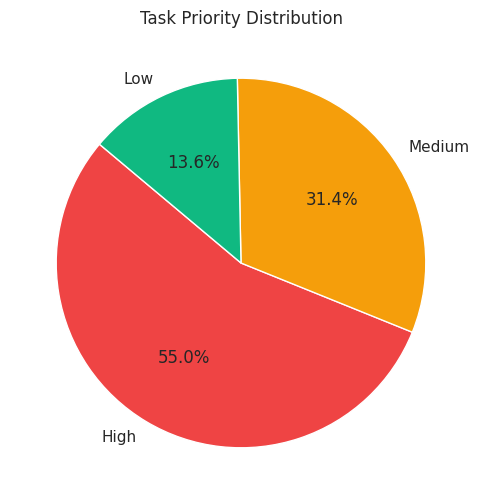

<ipython-input-2-f782077002ce>:37: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=user_workload, x='User', y='Hours', palette='Blues_d')


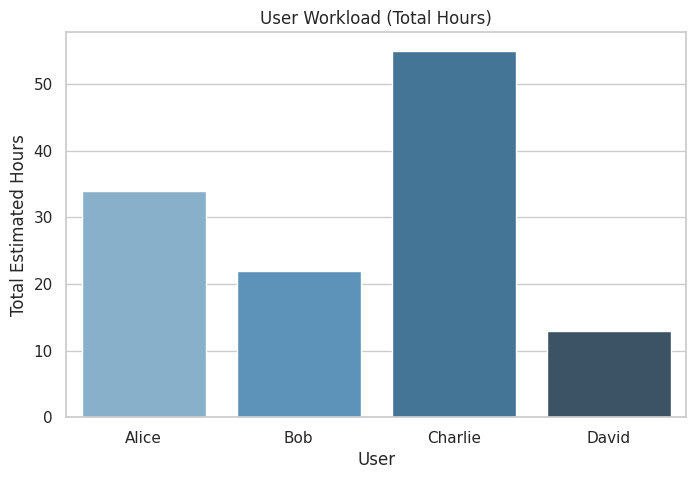

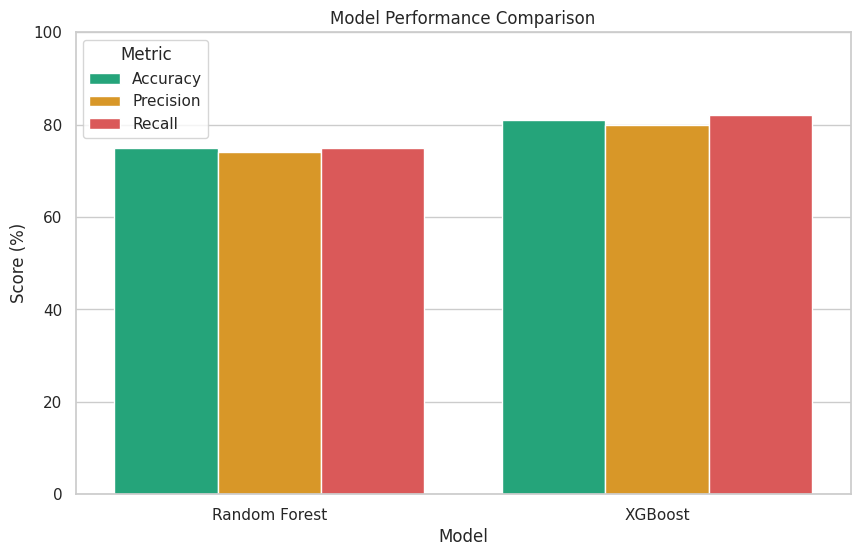

In [2]:
# ✅ Week 4 Dashboard in Google Colab (Matplotlib & Seaborn)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Example Data (replace with your actual results)
priority_distribution = pd.DataFrame({
    'Priority': ['High', 'Medium', 'Low'],
    'Count': [77, 44, 19]
})

user_workload = pd.DataFrame({
    'User': ['Alice', 'Bob', 'Charlie', 'David'],
    'Hours': [34, 22, 55, 13]
})

model_metrics = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Accuracy': [75, 81],
    'Precision': [74, 80],
    'Recall': [75, 82]
})

# Set plot style
sns.set(style="whitegrid")

# Plot 1: Priority Distribution
plt.figure(figsize=(6,6))
plt.pie(priority_distribution['Count'], labels=priority_distribution['Priority'], autopct='%1.1f%%',
        colors=["#EF4444", "#F59E0B", "#10B981"], startangle=140)
plt.title("Task Priority Distribution")
plt.show()

# Plot 2: User Workload
plt.figure(figsize=(8,5))
sns.barplot(data=user_workload, x='User', y='Hours', palette='Blues_d')
plt.title("User Workload (Total Hours)")
plt.ylabel("Total Estimated Hours")
plt.show()

# Plot 3: Model Performance
model_metrics_melted = model_metrics.melt(id_vars='Model', var_name='Metric', value_name='Score')
plt.figure(figsize=(10,6))
sns.barplot(data=model_metrics_melted, x='Model', y='Score', hue='Metric', palette=['#10B981','#F59E0B','#EF4444'])
plt.title("Model Performance Comparison")
plt.ylabel("Score (%)")
plt.ylim(0, 100)
plt.legend(title='Metric')
plt.show()


In [4]:
!pip install gradio


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.2/54.2 MB 20.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 323.1/323.1 kB 33.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 154.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 6.6 MB/s eta 0:00:00


In [5]:
# ✅ Week 4: Interactive Task Priority Predictor (Gradio in Colab)

import gradio as gr
import pandas as pd
import joblib

# Load model and encoders (ensure these are trained/saved earlier)
model = joblib.load("best_xgb_model.pkl")
le_sentiment = joblib.load("sentiment_encoder.pkl")
le_priority = joblib.load("priority_encoder.pkl")

def predict_priority(description, completion_time, sentiment):
    word_count = len(description.split())
    token_count = len(set(description.lower().split()))
    encoded_sentiment = le_sentiment.transform([sentiment])[0]

    input_df = pd.DataFrame([{
        "desc_word_count": word_count,
        "processed_token_count": token_count,
        "completion_time": completion_time,
        "sentiment_encoded": encoded_sentiment
    }])

    pred = model.predict(input_df)
    return le_priority.inverse_transform(pred)[0]

# Interface using Gradio
gr.Interface(
    fn=predict_priority,
    inputs=[
        gr.Textbox(label="Task Description"),
        gr.Slider(minimum=1, maximum=100, step=1, label="Estimated Completion Time (hours)"),
        gr.Dropdown(choices=["Focused", "Frustrated", "Neutral", "Hopeful", "Cautious"], label="User Sentiment")
    ],
    outputs=gr.Label(label="Predicted Task Priority"),
    title="🎯 AI Task Priority Predictor",
    description="Enter task info to get a predicted priority using your trained XGBoost model."
).launch()

# Note: Ensure `best_xgb_model.pkl`, `sentiment_encoder.pkl`, and `priority_encoder.pkl` are available in Colab.


FileNotFoundError: [Errno 2] No such file or directory: 'best_xgb_model.pkl'

In [6]:
import joblib

# Save the best model
joblib.dump(grid_xgb.best_estimator_, "best_xgb_model.pkl")

# Save encoders used for predictions
joblib.dump(le_sentiment, "sentiment_encoder.pkl")
joblib.dump(le_priority, "priority_encoder.pkl")


NameError: name 'grid_xgb' is not defined